Matplotlib обеспечивает кроссплатформенную реализацию. Совместим с большим числом ОС и обеспечивает различные форматы вывода. Интерфейс библиотечки заметно устарел, поэтому ее полезно использовать там, где не требуется сильный ux/ui, но необходима определенная надежность.

api matplotlib позволяет адаптировать вывод к таким пакетам как Seaborn, ggplot, HoloViews, Altair.

In [1]:
import matplotlib.pyplot as plt

##  Настройка стилей

plt.style

Будем использовать классический стиль, по ходу ноута оптимизируя его.

In [2]:
plt.style.use('classic')

## Три контекста построения графиков

### Построение графиков из сценария

Функция plt.show() запускает цикл ожидания события, ищет все активные на данный момент объекты графиков и открывает одно или несколько интератктивных окон для отображения.

In [3]:
import numpy as np
x = np.linspace(0, 10, 100)

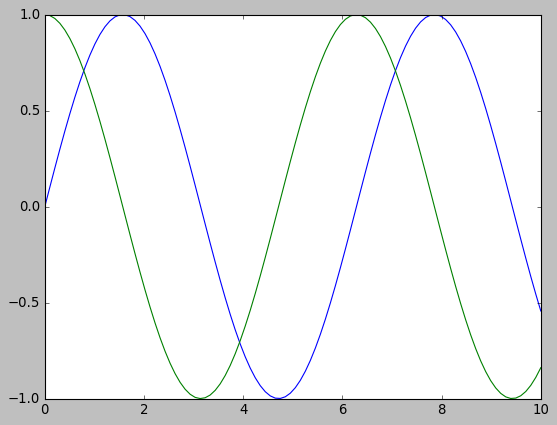

In [4]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.show()

Если такой сценарий поместить в отдельный файл, то его запуск приведет к открытию граф.оболочки системы с отображением графика.

plt.show() используется однократно в процессе выполнения сценария, чаще всего его помещают в конце ф-ла сценария. Выполнение нескольких plt.show() в одном сценарии может привести к непредсказуемому результату.

### Построение графиков из командной оболочки iPython

задается с помощью %matplotlibe После этого любой plot приводит к открытию окна графика в оболочке. При этом некоторые модификации графиков доступны только через plt.draw(). plt.show() не обязателен, однако вывод опять таки пойдет во внешний граф.интерпретатор.

In [5]:
%matplotlib
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg


In [6]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

### Построение графиков из блокнота iPython

%matplotlib notebook включает динамические графики

%matplotlib inline статические

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

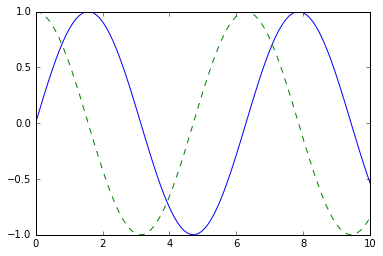

In [8]:
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')

## Сохранение в файл

In [9]:
fig.savefig('output/my_figure.png')

In [10]:
!ls -lh output/my_figure.png

-rw-rw-r-- 1 konstantin konstantin 26K Oct 31 21:13 output/my_figure.png


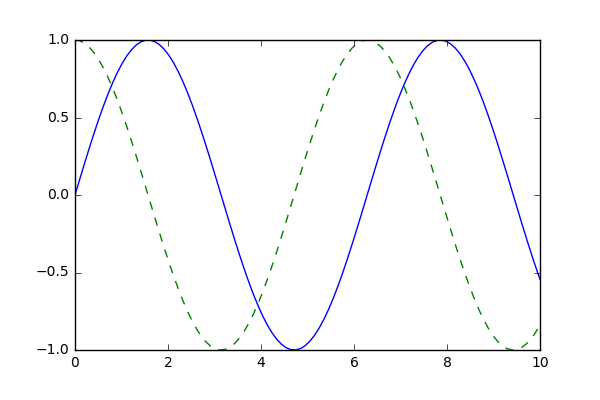

In [11]:
# можно отобразить. Это .png в данном дефолтном случае
from IPython.display import Image
Image('output/my_figure.png')

In [12]:
# список поддерживаемых форматов (специфичен к системе)
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

## Два интерфейса отображения

### MATLAB стиль

Такой интерфейс сохраняет состояние . Отслеживается текущий рисуноки оси координат для него. Для него выполняются все plt. Такой подход сложен для отображения нескольких рисунков и для перехода между ними

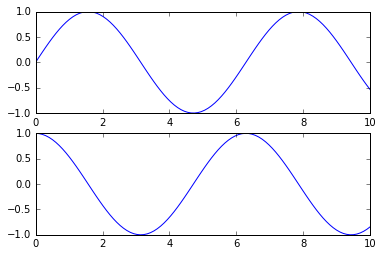

In [13]:
plt.figure()
# первая область и ее текущая ось
plt.subplot(2, 1, 1) # rows, columns, panel number
plt.plot(x, np.sin(x))
# вторая область и ее текущая ось
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))

### ООП стиль

В этом случае определяются методы явным образом определяемых объектов Figure и Axes

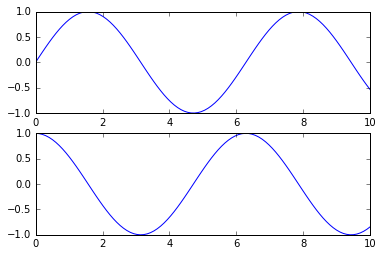

In [14]:
# Создадим сетку графиков
fig, ax = plt.subplots(2)

# вызовем метод plot() соответствующего объекта
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

## Простые линейные графики

In [15]:
plt.style.use('seaborn-whitegrid')

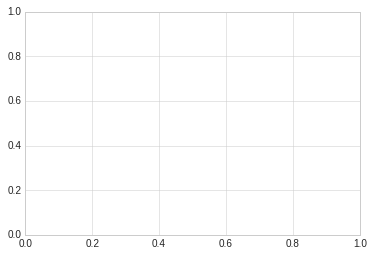

In [16]:
fig = plt.figure()
ax = plt.axes()

В данном случае figure() - единый контейнер для рисунка, содержащий все объекты, включая систему координат, графику, текст и метки. axes() - экземпляр системы координат, создающая оси

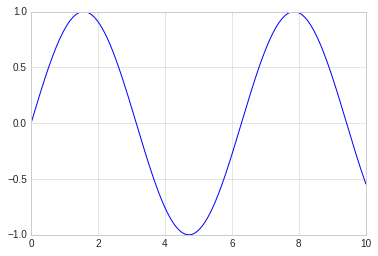

In [17]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))

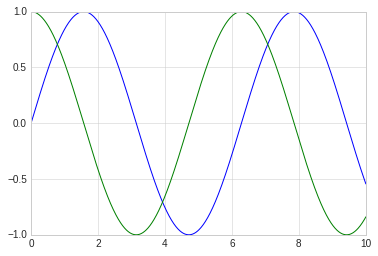

In [18]:
# можно вызвать несколько ф-й
fig = plt.figure()
ax = plt.axes()

ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x))

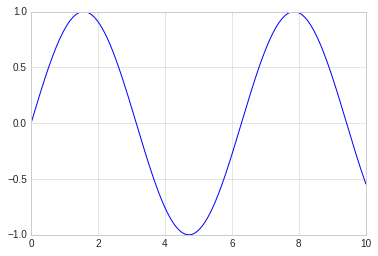

In [19]:
# в матлаб.стиле - отслеживая и изменяя единственный объект для программы
plt.plot(x, np.sin(x))

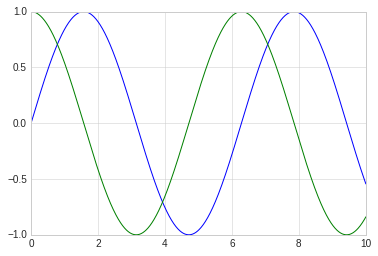

In [20]:
# можно вызвать несколько раз разные функции
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

### Цвета и линии

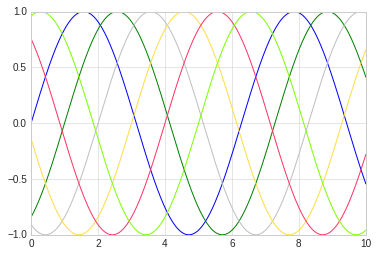

In [21]:
# цвет
fig = plt.figure()
ax = plt.axes()

ax.plot(x, np.sin(x - 0), color='blue') # по названию
ax.plot(x, np.sin(x - 1), color='g') # по краткому коду (rgbcmyc)
ax.plot(x, np.sin(x - 2), color='0.75') # по шкале оттенков серого
ax.plot(x, np.sin(x - 3), color='#FFDD44') # по шестнадцатиричному коду
ax.plot(x, np.sin(x - 4), color=(1.0, 0.2, 0.4)) # по кортежу RGB
ax.plot(x, np.sin(x - 5), color='chartreuse') # по названию из HTML-спецификации

Если цвет не задан, библиотечка задаст сама.

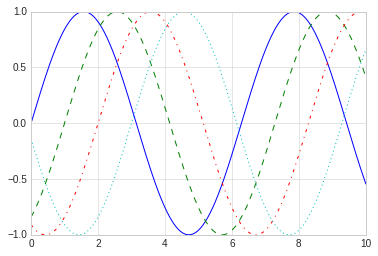

In [22]:
# стиль
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x - 0), linestyle='solid')
ax.plot(x, np.sin(x - 1), linestyle='dashed')
ax.plot(x, np.sin(x - 2), linestyle='dashdot')
ax.plot(x, np.sin(x - 3), linestyle='dotted')

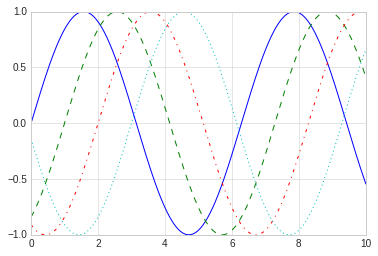

In [23]:
# или так
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x - 0), linestyle='-')
ax.plot(x, np.sin(x - 1), linestyle='--')
ax.plot(x, np.sin(x - 2), linestyle='-.')
ax.plot(x, np.sin(x - 3), linestyle=':')

Методы задания цвета и стиля можно задать, если они краткие

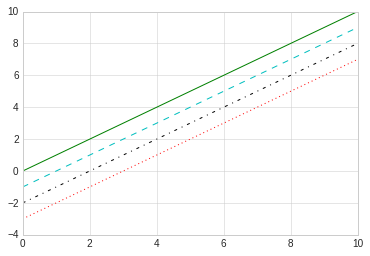

In [24]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, x - 0, '-g')
ax.plot(x, x - 1, '--c')
ax.plot(x, x - 2, '-.k')
ax.plot(x, x - 3, ':r')

### Пределы осей координат

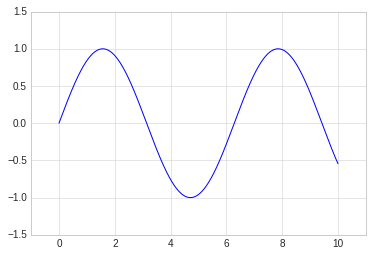

In [25]:
fig = plt.figure()
ax = plt.axes()
ax.set_xlim(-1, 11)
ax.set_ylim(-1.5, 1.5)
ax.plot(x, np.sin(x - 0))

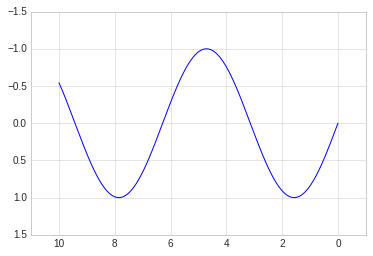

In [26]:
# зеркально
fig = plt.figure()
ax = plt.axes()
ax.set_xlim(11, -1)
ax.set_ylim(1.5, -1.5)
ax.plot(x, np.sin(x - 0))

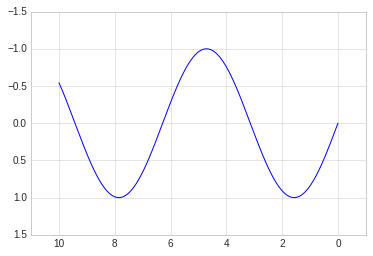

In [27]:
# одним кусом
fig = plt.figure()
ax = plt.axes()
ax.axis([11, -1, 1.5, -1.5])
ax.plot(x, np.sin(x - 0))

(0.0, 10.0, -0.9999972954811321, 0.9999996994977832)

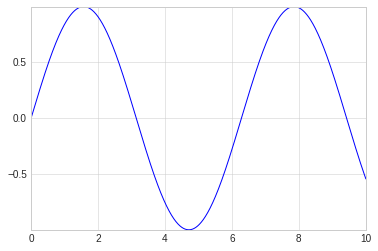

In [28]:
# автоподгонка
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x - 0))
ax.axis('tight')

(0.0, 10.0, -1.0, 1.0)

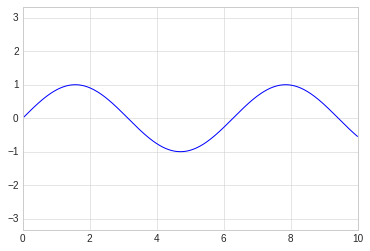

In [29]:
# подгонка под масштаб
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x - 0))
ax.axis('equal')

## Метки

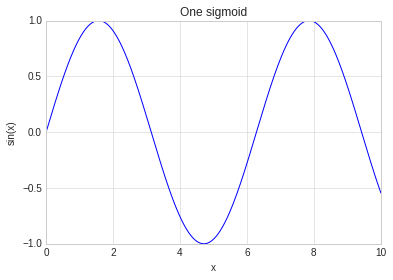

In [30]:
fig = plt.figure()
ax = plt.axes()
ax.set_title('One sigmoid')
ax.set_xlabel('x')
ax.set_ylabel('sin(x)')
ax.plot(x, np.sin(x - 0))

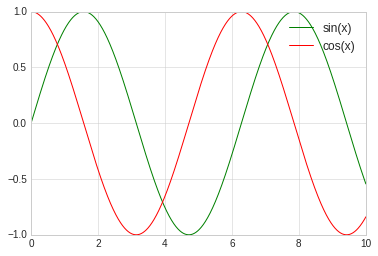

In [31]:
# легенда графика
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x), '-g', label='sin(x)')
ax.plot(x, np.cos(x), '-r', label='cos(x)')
ax.legend()

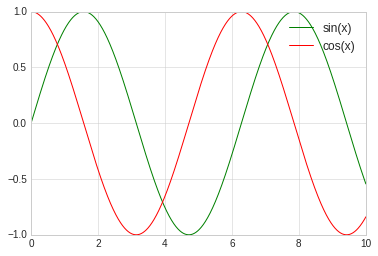

In [32]:
# естественно все тоже самое доступно через plot
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), '-r', label='cos(x)')
plt.legend()

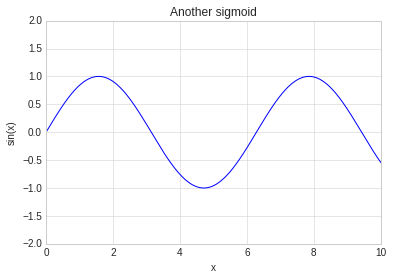

In [33]:
# кроме того, все опции доступны через ax.set()
fig = plt.figure()
ax = plt.axes()
ax.set(xlim=(0, 10), ylim=(-2, 2),
      xlabel='x', ylabel='sin(x)',
      title='Another sigmoid')
ax.plot(x, np.sin(x - 0))

## Диаграммы рассеяния

In [34]:
plt.style.use('seaborn-whitegrid')

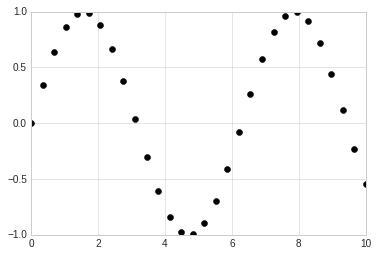

In [35]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, 'o', color = 'black')

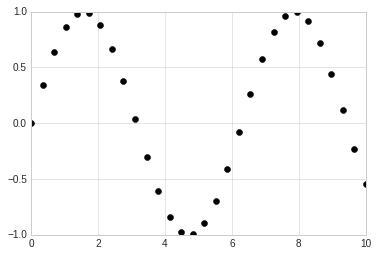

In [36]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y, 'o', color = 'black')

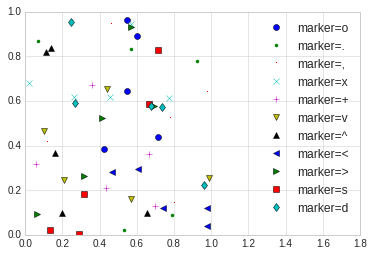

In [37]:
# все наиболее састо используемые типы символов для вывода диаграм
fig = plt.figure()
ax = plt.axes()
ax.set_xlim(0, 1.8)
rnd = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    ax.plot(rnd.rand(5), rnd.rand(5), marker, label='marker={0}'.format(marker))
ax.legend(numpoints=1)

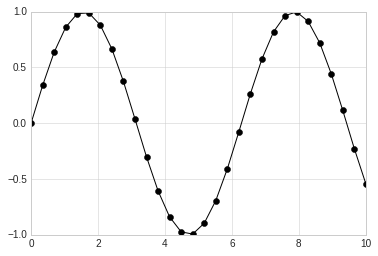

In [38]:
# млжно использовать сокращенные коды линий и цветов
# тут - линия, o код точяки, k кодц ыета
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y, '-ok')

#### plt.scattter

с помощью метода можно создавать диаграммы с индивидуально заданными свойствами каждой точки

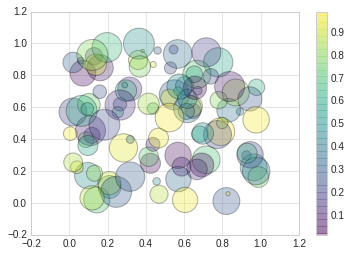

In [39]:
rnd = np.random.RandomState(0)
x = rnd.random(100)
y = rnd.random(100)
colors = rnd.rand(100)
sizes = 1000 * rnd.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar() # цветовая шкала

Text(0, 0.5, 'sepal width (cm)')

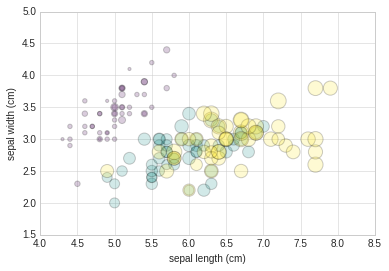

In [40]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

fig = plt.figure()
ax = plt.axes()
ax.scatter(features[0], features[1], alpha=0.2, s=100*features[3], c=iris.target, cmap='viridis')
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])

**plt.scatter значительно уступает по производительности plt.plot**

## Визуализация погрешностей

#### Простые планки погрешностей

fmt - код форматирования, управляющий внешним видом линий и точек

Кроме свечей, доступны горизонтальные линии погрешности, односторонние планки и др. См. метод errorbar

<ErrorbarContainer object of 3 artists>

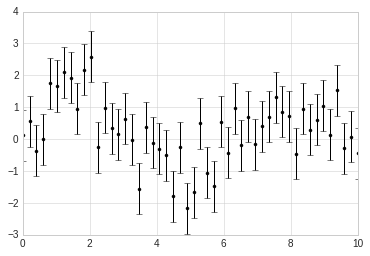

In [41]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

fig = plt.figure()
ax = plt.axes()
ax.errorbar(x, y, yerr=dy, fmt='.k')

<ErrorbarContainer object of 3 artists>

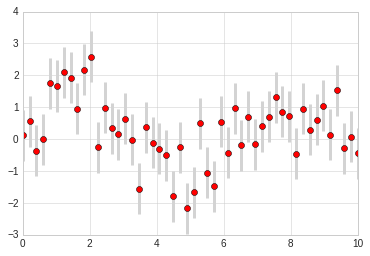

In [42]:
# еще пример

fig = plt.figure()
ax = plt.axes()
ax.errorbar(x, y, yerr=dy, fmt='o', color='r', ecolor='lightgray', elinewidth=3, capsize=0)

#### Непрерывные погрешности

Готового решения в пакете нет. Можно перейти на seaborn

In [43]:
from sklearn.gaussian_process import GaussianProcessRegressor

# model
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# подгонка гауссова процесса
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 100)
yfit, MSE = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * np.sqrt(MSE) # доверительный интервал 95%

In [44]:
print(GaussianProcessRegressor.__doc__)

Gaussian process regression (GPR).

    The implementation is based on Algorithm 2.1 of Gaussian Processes
    for Machine Learning (GPML) by Rasmussen and Williams.

    In addition to standard scikit-learn estimator API,
    GaussianProcessRegressor:

       * allows prediction without prior fitting (based on the GP prior)
       * provides an additional method sample_y(X), which evaluates samples
         drawn from the GPR (prior or posterior) at given inputs
       * exposes a method log_marginal_likelihood(theta), which can be used
         externally for other ways of selecting hyperparameters, e.g., via
         Markov chain Monte Carlo.

    Read more in the :ref:`User Guide <gaussian_process>`.

    .. versionadded:: 0.18

    Parameters
    ----------
    kernel : kernel instance, default=None
        The kernel specifying the covariance function of the GP. If None is
        passed, the kernel "1.0 * RBF(1.0)" is used as default. Note that
        the kernel's hyperparamete

In [45]:
print(gp.predict.__doc__)

Predict using the Gaussian process regression model

        We can also predict based on an unfitted model by using the GP prior.
        In addition to the mean of the predictive distribution, also its
        standard deviation (return_std=True) or covariance (return_cov=True).
        Note that at most one of the two can be requested.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features) or list of object
            Query points where the GP is evaluated.

        return_std : bool, default=False
            If True, the standard-deviation of the predictive distribution at
            the query points is returned along with the mean.

        return_cov : bool, default=False
            If True, the covariance of the joint predictive distribution at
            the query points is returned along with the mean

        Returns
        -------
        y_mean : ndarray of shape (n_samples, [n_output_dims])
            Mean of predictive distri

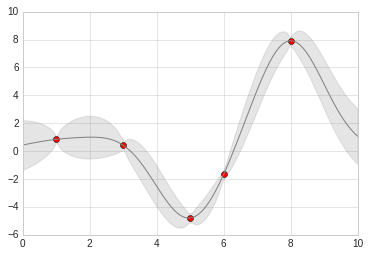

In [47]:
# визуализация
fig = plt.figure()
ax = plt.axes()
ax.set_xlim(0, 10)
ax.plot(xdata, ydata, 'or')
ax.plot(xfit, yfit, '-', color='gray')
ax.fill_between(xfit, yfit - dyfit, yfit + dyfit, color='gray', alpha=0.2)

## Графики плотности и контурные графики

- plt.contour - контурные графики
- plt.contourf  - с заполнением
- plt.imshow - отображение картинок

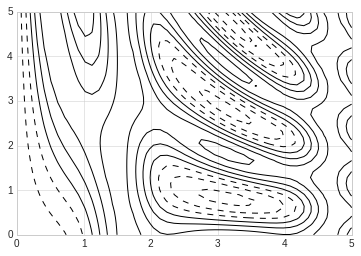

In [48]:
# визуализация трехмерной ф-ии
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y) # формирует двумерные координаты из одномерных массивов
Z = f(X, Y) # третья координатная сетка будет представлена контурами уровней

fig = plt.figure()
ax = plt.axes()
ax.contour(X, Y, Z, colors='black')

Тут атрицательные значения обозначены пунктиром (так потому что по дефолту выбран один цвет)

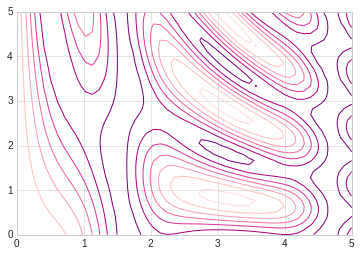

In [49]:
# другая карта цветов
fig = plt.figure()
ax = plt.axes()
ax.contour(X, Y, Z, cmap='RdPu')

# все карты цветов
# plt.cm.<TAB>

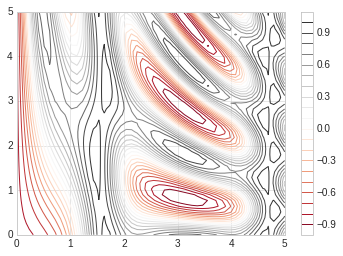

In [50]:
plt.contour(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()

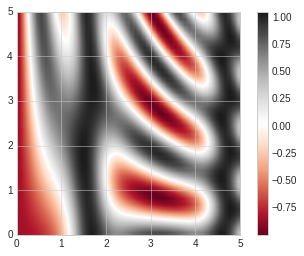

In [51]:
# лучше отрендерить это можно через plt.imshow
# В данном случае придется правда вручную задавать координаты в extend
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy')
plt.colorbar()

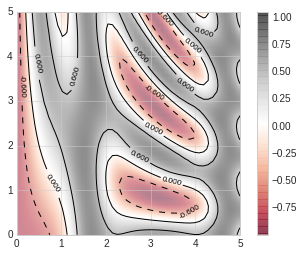

In [52]:
# можно совместить несколько отображений (задав метки на контурах)
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy', alpha=0.5)
plt.colorbar()

## Гистограммы, разбиения по интервалам и плотность

(array([11.,  8., 11.,  6., 14.,  6.,  7.,  9., 14., 14.]),
 array([0.00562356, 0.10462839, 0.20363321, 0.30263804, 0.40164286,
        0.50064769, 0.59965251, 0.69865734, 0.79766216, 0.89666698,
        0.99567181]),
 <a list of 10 Patch objects>)

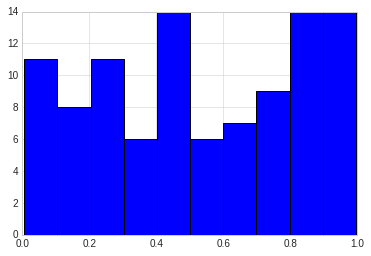

In [53]:
data = np.random.rand(100)

fig = plt.figure()
ax = plt.axes()
ax.hist(data)

(array([3., 0., 8., 1., 2., 5., 3., 4., 4., 2., 2., 2., 3., 4., 7., 3., 1.,
        2., 3., 2., 2., 5., 2., 2., 5., 1., 8., 4., 6., 4.]),
 array([0.00562356, 0.03862517, 0.07162678, 0.10462839, 0.13763   ,
        0.1706316 , 0.20363321, 0.23663482, 0.26963643, 0.30263804,
        0.33563965, 0.36864125, 0.40164286, 0.43464447, 0.46764608,
        0.50064769, 0.53364929, 0.5666509 , 0.59965251, 0.63265412,
        0.66565573, 0.69865734, 0.73165894, 0.76466055, 0.79766216,
        0.83066377, 0.86366538, 0.89666698, 0.92966859, 0.9626702 ,
        0.99567181]),
 <a list of 1 Patch objects>)

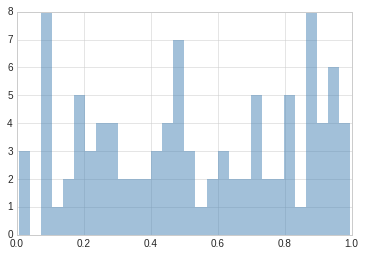

In [61]:
fig = plt.figure()
ax = plt.axes()
ax.hist(data, bins=30, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none')

In [62]:
# функция histogram() из numpy считает гистограму, не отображая
counts, bin_edges = np.histogram(data, bins=5)
counts

array([19, 17, 20, 16, 28])

#### Двумерные гистограммы

In [63]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

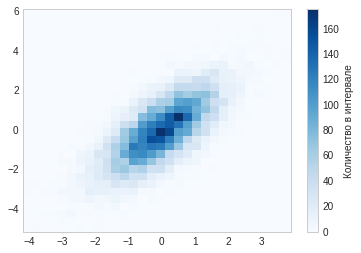

In [66]:
# plt.hist2d
plt.hist2d(x, y, bins=30, cmap='Blues')
plt.colorbar().set_label('Количество в интервале')

In [68]:
# получить данные в numpy
counts, xedges, yedges = np.histogram2d(x, y, bins=30)
counts.size

900

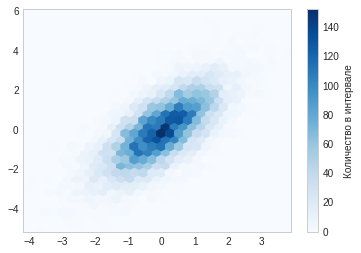

In [70]:
# plt.hexbin - через шестиугольники
plt.hexbin(x, y, gridsize=30, cmap='Blues')
plt.colorbar().set_label('Количество в интервале')

## Ядерная оценка плотности распределения (KDE)

проще делать на Seaborn

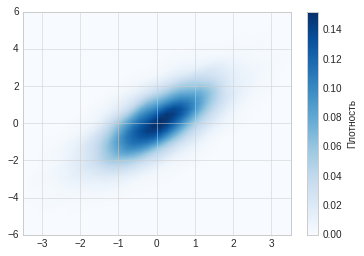

In [71]:
from scipy.stats import gaussian_kde

# подбор на массиве размера [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# вычисление на регулярной коорд.сетке
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# строим график
plt.imshow(Z.reshape(Xgrid.shape), origin='lower', aspect='auto', extent=[-3.5, 3.5, -6, 6], cmap='Blues')
plt.colorbar().set_label('Плотность')